In [ ]:
# import libraries
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# load the dataset
n_samples = 10000
n_features = 10

X_raw, y_raw = make_classification(n_samples=10000, n_features=10, n_informative=7, n_redundant=0, n_repeated=0, random_state=0,
                                   n_classes=2, weights=[0.9, 0.1], shuffle=False)

n_samples, n_features = X_raw.shape
print('No. samples = ', n_samples)
print('No. features = ', n_features)

No. samples =  10000
No. features =  10


In [ ]:
# split in train and test
X_train, X_test, y_train, y_test = train_test_split(X_raw, y_raw, test_size=0.33, random_state=0)

# scale train dataset
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

# scale test dataset
X_test_scaled = scaler.transform(X_test)

In [ ]:
# train logistic regression & cross validation
clf_L2 = LogisticRegressionCV(Cs=100, cv=10, penalty='l2', random_state=0, multi_class='multinomial', solver='lbfgs', n_jobs=-1)
clf_L2.fit(X_train_scaled, y_train)

LogisticRegressionCV(Cs=100, cv=10, multi_class='multinomial', n_jobs=-1,
                     random_state=0)

In [ ]:
# Compute ROC curve and ROC area for each class
LR_y_score = clf_L2.predict_proba(X_test_scaled)[:,1]
LR_fpr, LR_tpr, LR_thresholds = roc_curve(y_test, LR_y_score)
LR_roc_auc = auc(LR_fpr, LR_tpr)
print('LR AUC = ', LR_roc_auc)

LR AUC =  0.7635294117647058


In [ ]:
# train Random Forest
clf_RF = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
clf_RF.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=5, random_state=0)

In [ ]:
# Compute ROC curve and ROC area for each class
RF_y_score = clf_RF.predict_proba(X_test_scaled)[:,1]
RF_fpr, RF_tpr, RF_thresholds = roc_curve(y_test, RF_y_score)
RF_roc_auc = auc(RF_fpr, RF_tpr)
print('RF AUC = ', RF_roc_auc)

RF AUC =  0.9190217607313196


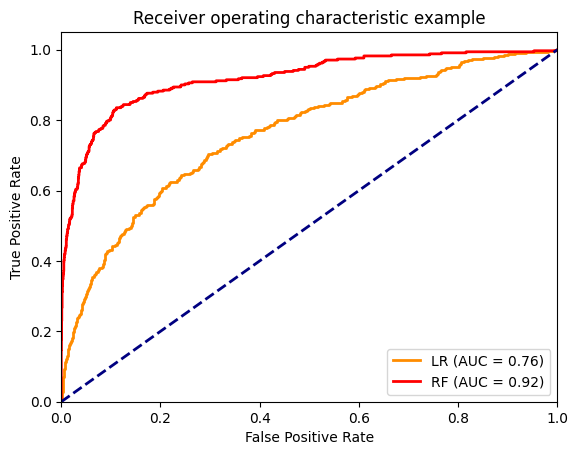

In [ ]:
plt.figure()
lw = 2
plt.plot(LR_fpr, LR_tpr, color='darkorange',
         lw=lw, label='LR (AUC = %0.2f)' % LR_roc_auc)
plt.plot(RF_fpr, RF_tpr, color='red',
         lw=lw, label='RF (AUC = %0.2f)' % RF_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#XG BOOST

In [ ]:
import xgboost as xgb

In [ ]:
dtrain = xgb.DMatrix(X_train_scaled, label=y_train)
dtest = xgb.DMatrix(X_test_scaled, label=y_test)

In [ ]:
# XGBoost training
num_round = 50
xgb_params = {"objective": "binary:logistic", "eta": 0.4, "booster": "gbtree", "max_depth": 3}
watchlist = [(dtrain, "train"), (dtest, "valid")]
bst = xgb.train(xgb_params, dtrain, num_round, watchlist)


[0]	train-logloss:0.29291	valid-logloss:0.29820
[1]	train-logloss:0.26651	valid-logloss:0.27733
[2]	train-logloss:0.23960	valid-logloss:0.25501
[3]	train-logloss:0.22723	valid-logloss:0.24416
[4]	train-logloss:0.21737	valid-logloss:0.23532
[5]	train-logloss:0.19838	valid-logloss:0.21940
[6]	train-logloss:0.18969	valid-logloss:0.21327
[7]	train-logloss:0.18067	valid-logloss:0.20646
[8]	train-logloss:0.16807	valid-logloss:0.19468
[9]	train-logloss:0.16386	valid-logloss:0.19209
[10]	train-logloss:0.16009	valid-logloss:0.18986
[11]	train-logloss:0.15432	valid-logloss:0.18498
[12]	train-logloss:0.15153	valid-logloss:0.18368
[13]	train-logloss:0.14516	valid-logloss:0.17768
[14]	train-logloss:0.13919	valid-logloss:0.17283
[15]	train-logloss:0.13709	valid-logloss:0.17175
[16]	train-logloss:0.13441	valid-logloss:0.16996
[17]	train-logloss:0.12302	valid-logloss:0.15737
[18]	train-logloss:0.12001	valid-logloss:0.15560
[19]	train-logloss:0.11877	valid-logloss:0.15476
[20]	train-logloss:0.11187	val

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[36]	train-logloss:0.07577	valid-logloss:0.11877
[37]	train-logloss:0.07404	valid-logloss:0.11825
[38]	train-logloss:0.07327	valid-logloss:0.11843
[39]	train-logloss:0.07294	valid-logloss:0.11828
[40]	train-logloss:0.07196	valid-logloss:0.11839
[41]	train-logloss:0.07083	valid-logloss:0.11839
[42]	train-logloss:0.07007	valid-logloss:0.11848
[43]	train-logloss:0.06883	valid-logloss:0.11853
[44]	train-logloss:0.06726	valid-logloss:0.11764
[45]	train-logloss:0.06641	valid-logloss:0.11706
[46]	train-logloss:0.06594	valid-logloss:0.11758
[47]	train-logloss:0.06542	valid-logloss:0.11765
[48]	train-logloss:0.06456	valid-logloss:0.11727
[49]	train-logloss:0.06371	valid-logloss:0.11746


In [ ]:
xgb_y_score = bst.predict(dtest)
xgb_fpr, xgb_tpr, xgb_thresholds = roc_curve(y_test, xgb_y_score)
xgb_roc_auc = auc(xgb_fpr, xgb_tpr)
print('XGBoost AUC = ', xgb_roc_auc)

XGBoost AUC =  0.9549781399046106


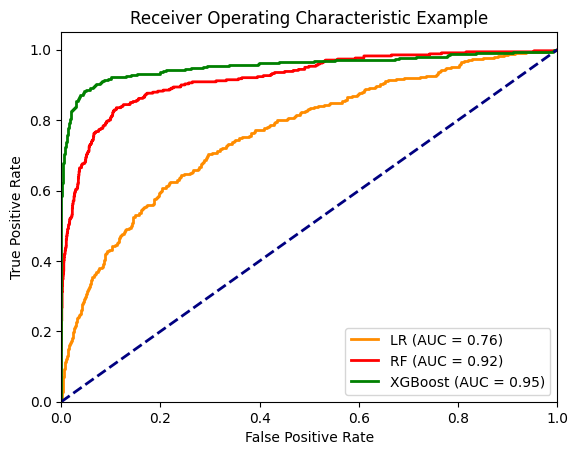

In [ ]:
plt.figure()
lw = 2
plt.plot(LR_fpr, LR_tpr, color='darkorange', lw=lw, label='LR (AUC = %0.2f)' % LR_roc_auc)
plt.plot(RF_fpr, RF_tpr, color='red', lw=lw, label='RF (AUC = %0.2f)' % RF_roc_auc)
plt.plot(xgb_fpr, xgb_tpr, color='green', lw=lw, label='XGBoost (AUC = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Example')
plt.legend(loc="lower right")
plt.show()